In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import librosa, librosa.display

In [3]:
example = "disco.00001.wav"

Load audio file with librosa

In [4]:
signal, sample_rate = librosa.load(example)

In [5]:
print(signal)

[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141]


In [6]:
print(sample_rate)

22050


In [7]:
FIG_SIZE = (16,8)

Text(0.5, 1.0, 'waveform')

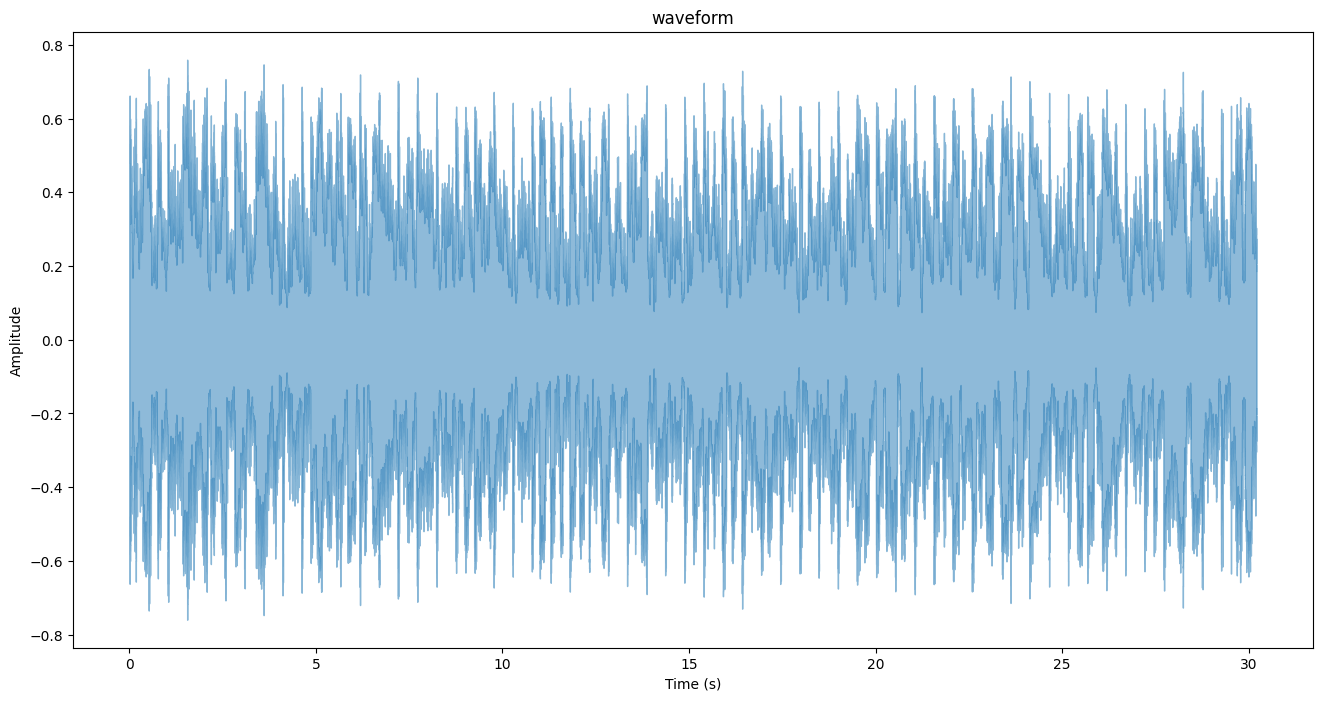

In [8]:
#waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("waveform")

In [9]:
#fourier trasnform (FFT) - Frequency Domain
fft = np.fft.fft(signal)

In [10]:
#calculate the magnitude (abs values in complex numbers)
spectrum = np.abs(fft)

In [11]:
#create the frequency variable
f = np.linspace(0,sample_rate,len(spectrum))

Text(0.5, 1.0, 'Power spectrum')

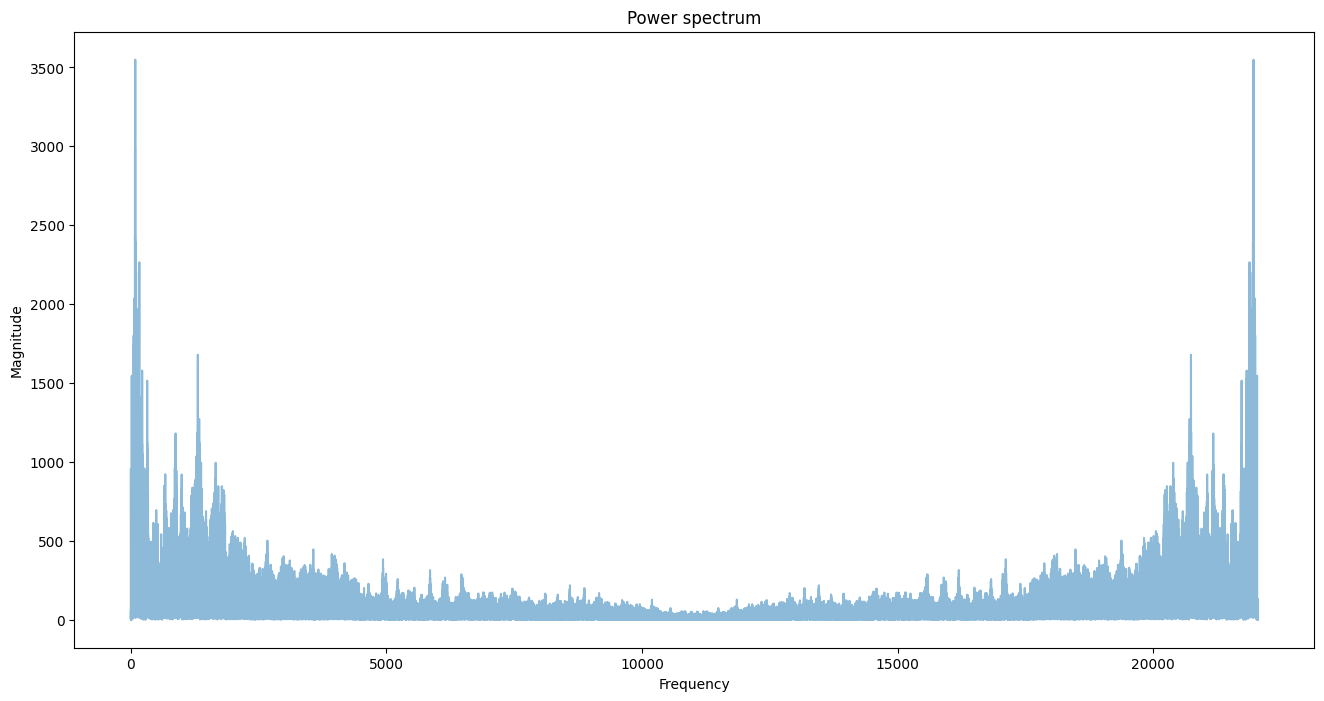

In [12]:
#plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f,spectrum,alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [13]:
#Take one half of the spectrum and frequecny
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power spectrum')

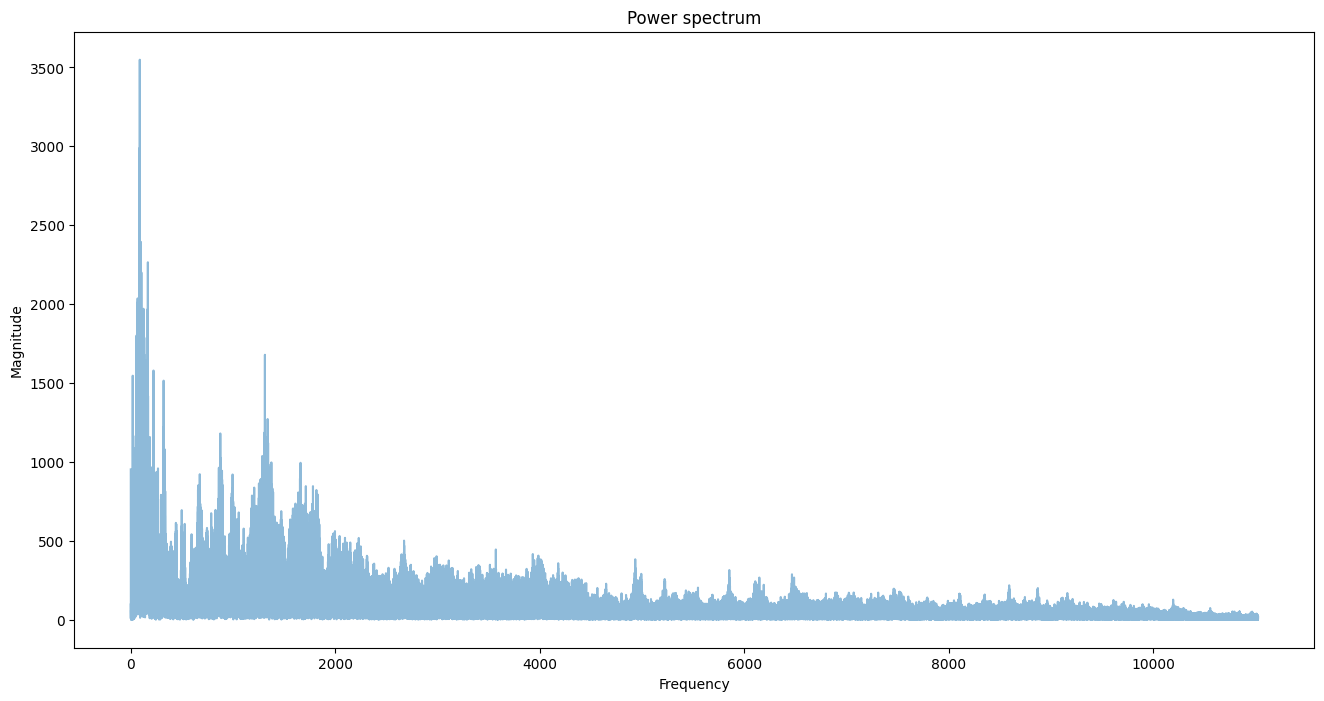

In [14]:
#Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f,left_spectrum,alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [15]:
#Spectrogram(STFT)
hop_length = 512 #no. of samples
n_fft = 2048 #no. of samples for the window


In [16]:
#perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [17]:
#calculate the magnitude (abs values in complex numbers)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrum')

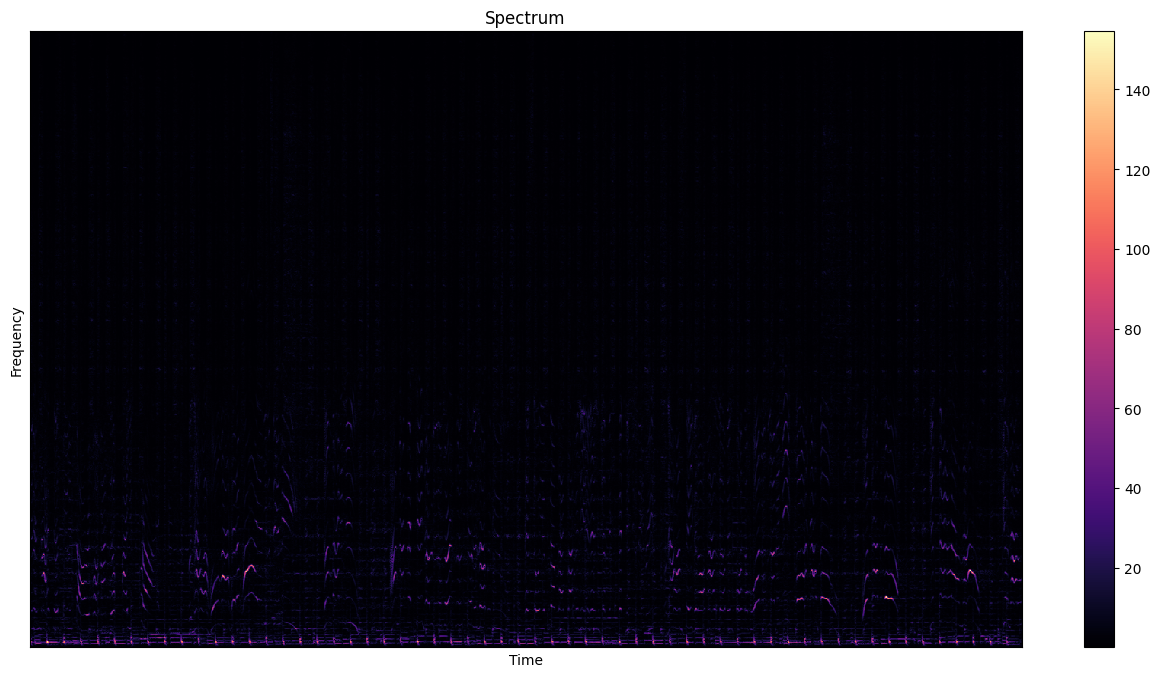

In [18]:
#plot spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram,sr=sample_rate,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrum")

In [19]:
#apply logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrum')

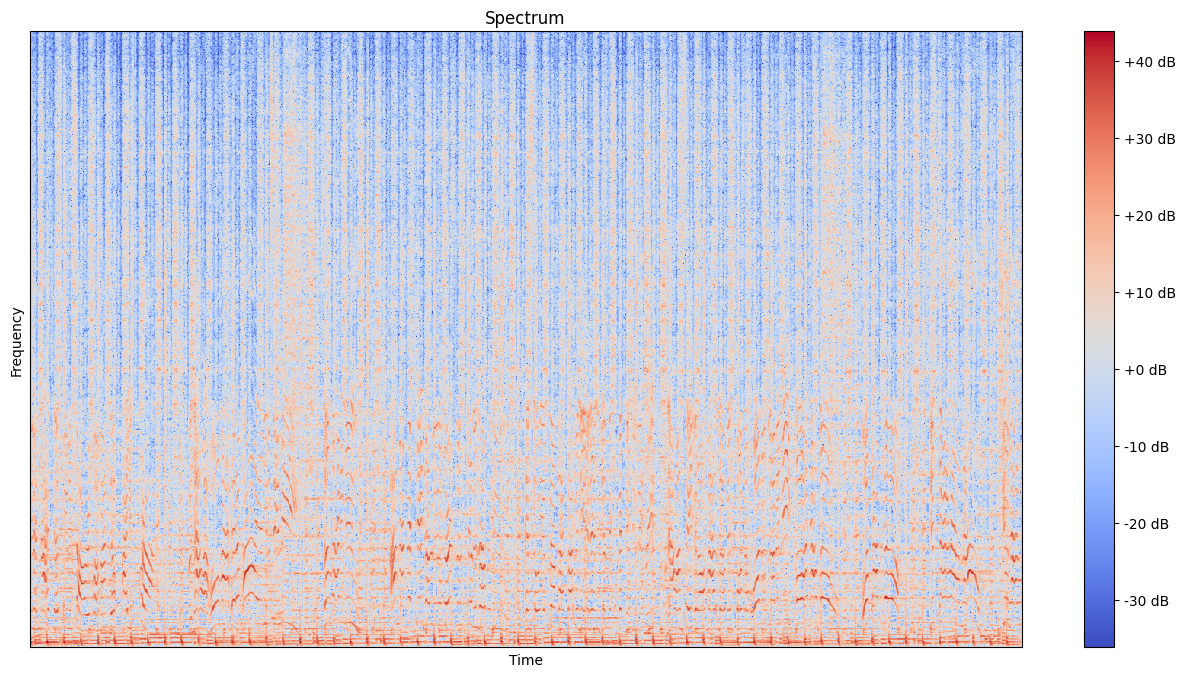

In [20]:
#plot the spectrogram in decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram,sr=sample_rate,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrum")

In [21]:
#MFCCs (we use MFCCs)
MFCCs = librosa.feature.mfcc(y=signal,sr=sample_rate,n_fft=n_fft,hop_length=hop_length,n_mfcc=13)

Text(0.5, 1.0, 'MFCCs')

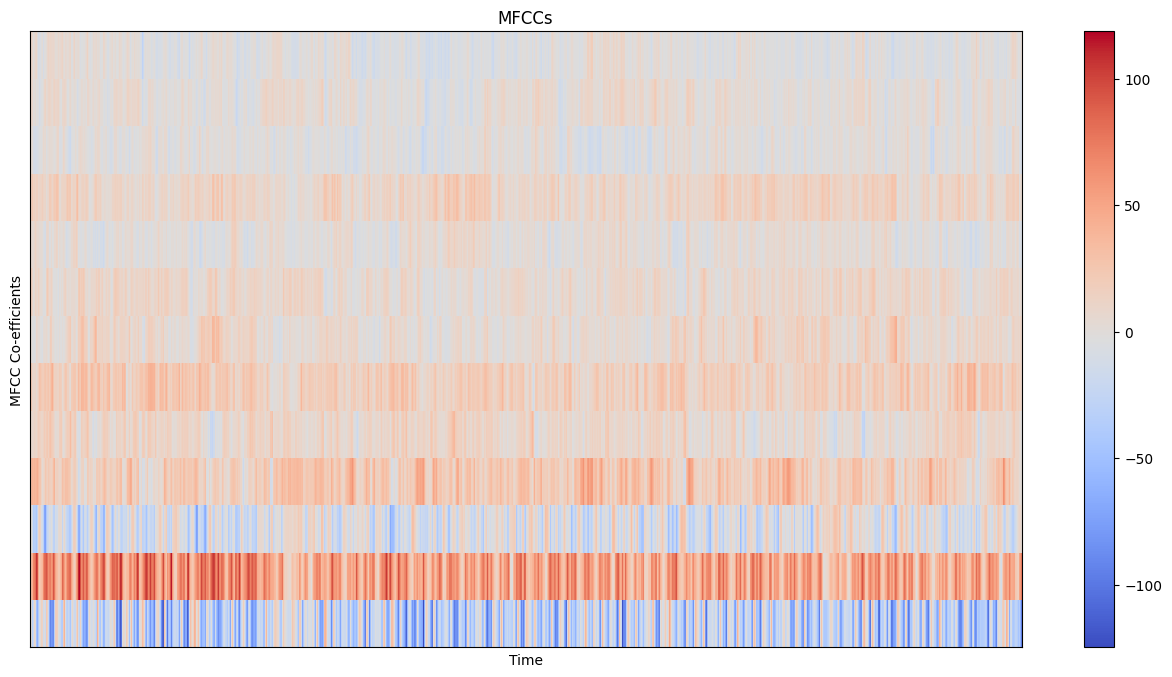

In [22]:
#PLot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs,sr=sample_rate,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC Co-efficients")
plt.colorbar()
plt.title("MFCCs")

In [27]:
import json
import os
import math

In [36]:
DATASET_PATH = "D:\6thSem\TNTL\project\mgrDat\Data\genres_original/"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [32]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)